In [ ]:
#diferencias de precios en la misma zona

In [ ]:
# Con la finalidad de comparar el modelo en distintas Municipios:  La Matanza, Lomas de Zamora y Tigre 
#tienen más de 500 registros
#son de tres zonas distintas del conurbano
# la cantidad de registros no varia mucho entre ellos
# armar un modelo inicial con superficie total 
# ver el tema de la ubicacion relacionarla con algun punto y calcular distancias 
# variable target precio 
# variables predictoras superfice total y ubicacion #probar con otra: ambientes 

#armar tres datasets: uno por cada municipio 



In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
data = pd.read_csv("./data_limpio_gdf.csv")
print(data.shape)
data.head(4)

(45439, 15)


,municipio,provincia,lat,lon,sup_m2_total,precio_usd,tipo,ambientes_cat,precio_usd_por_m2,tipo_cat_code,municipio_cat_code,provincia_cat_code,ambientes_cat_code,geometry,precio_usd_por_m2_cat
0,Mataderos,Capital Federal,-34.661824,-58.508839,40.0,62000.0,PH,1,1550.000000,0,194,5,1,POINT (-58.5088387 -34.6618237),2
1,Mataderos,Capital Federal,-34.652262,-58.522982,55.0,72000.0,apartment,2,1309.090909,1,194,5,2,POINT (-58.5229825 -34.6522615),2
2,Vicente López,Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,78.0,130000.0,PH,3,1666.666667,0,360,0,3,POINT (-58.52178249999999 -34.53295670000001),3
3,Belgrano,Capital Federal,-34.559873,-58.443362,40.0,138000.0,apartment,1,3450.000000,1,25,5,1,POINT (-58.443362 -34.5598729),8


In [98]:
data.isna().sum().sort_values()

municipio                   0
provincia                   0
lat                         0
lon                         0
sup_m2_total                0
precio_usd                  0
tipo                        0
precio_usd_por_m2           0
tipo_cat_code               0
municipio_cat_code          0
provincia_cat_code          0
ambientes_cat_code          0
geometry                    0
precio_usd_por_m2_cat       0
ambientes_cat            1248
dtype: int64

In [99]:
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec

sns.set()

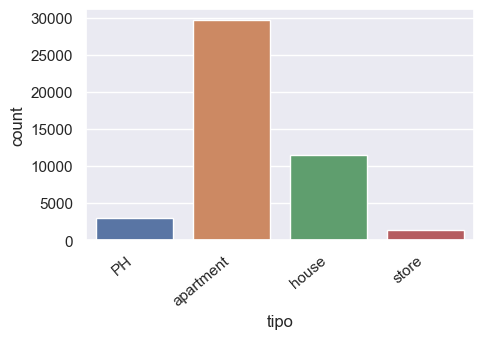

In [100]:
plt.figure(figsize=(5,3))

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
ax = sns.countplot(data = data, x = "tipo")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.show()

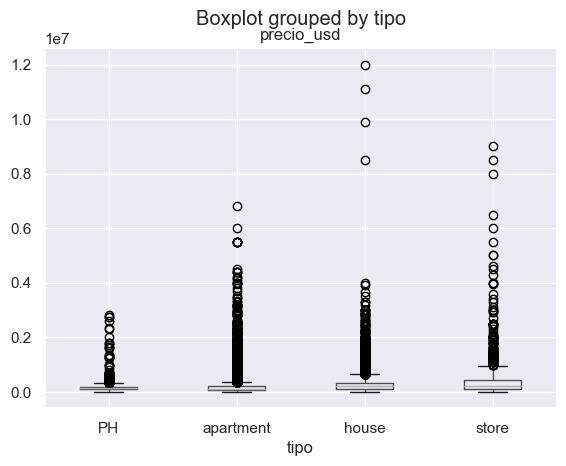

In [101]:
data.boxplot(column= "precio_usd", by="tipo") 
plt.show()

In [122]:
pd.options.display.max_rows = None
data.groupby(["tipo"])["municipio"].value_counts().sort_values(ascending=False)

tipo       municipio      
apartment  Mar del Plata      3346
           Rosario            2067
           Palermo            1833
           Belgrano           1688
           Caballito          1569
           Recoleta           1130
house      Mar del Plata       939
apartment  Córdoba             937
           Flores              895
           Villa Urquiza       894
house      Córdoba             857
apartment  Barrio Norte        801
           Almagro             775
           Villa Crespo        724
house      Tigre               657
apartment  San Telmo           641
           Vicente López       521
           Balvanera           498
house      Pilar               452
apartment  Tres de Febrero     450
           La Matanza          438
           La Plata            417
           Pinamar             403
house      San Isidro          381
           Rosario             347
PH         Mar del Plata       342
house      Lomas de Zamora     325
           La Matanza       

In [102]:
pd.options.display.max_rows = None
data.groupby(["provincia"])["municipio"].value_counts().sort_values(ascending=False)


provincia                     municipio                          
Buenos Aires Costa Atlántica  Mar del Plata                          4756
Santa Fe                      Rosario                                2479
Capital Federal               Palermo                                2071
Córdoba                       Córdoba                                1922
Capital Federal               Belgrano                               1847
                              Caballito                              1726
                              Recoleta                               1205
                              Flores                                 1118
                              Villa Urquiza                          1042
Bs.As. G.B.A. Zona Oeste      La Matanza                              932
Capital Federal               Villa Crespo                            896
Bs.As. G.B.A. Zona Norte      Vicente López                           894
Capital Federal               Almagro         

In [103]:
data.groupby(["municipio"])["provincia"].count().sort_values(ascending=False)

municipio
Mar del Plata                          4756
Rosario                                2479
Palermo                                2071
Córdoba                                1922
Belgrano                               1847
Caballito                              1726
Recoleta                               1205
Flores                                 1118
Villa Urquiza                          1042
La Matanza                              932
Villa Crespo                            896
Vicente López                           894
Almagro                                 892
Barrio Norte                            859
Tigre                                   854
Tres de Febrero                         758
Pinamar                                 734
Pilar                                   731
San Telmo                               721
San Isidro                              682
La Plata                                663
Balvanera                               566
Lomas de Zamora       

In [104]:
limite = 545

data = data.copy().groupby(['municipio']).filter(lambda grp: grp.shape[0] > limite)

In [105]:
from matplotlib import gridspec
sns.set()

c:\Users\DELL\anaconda3\envs\DH\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


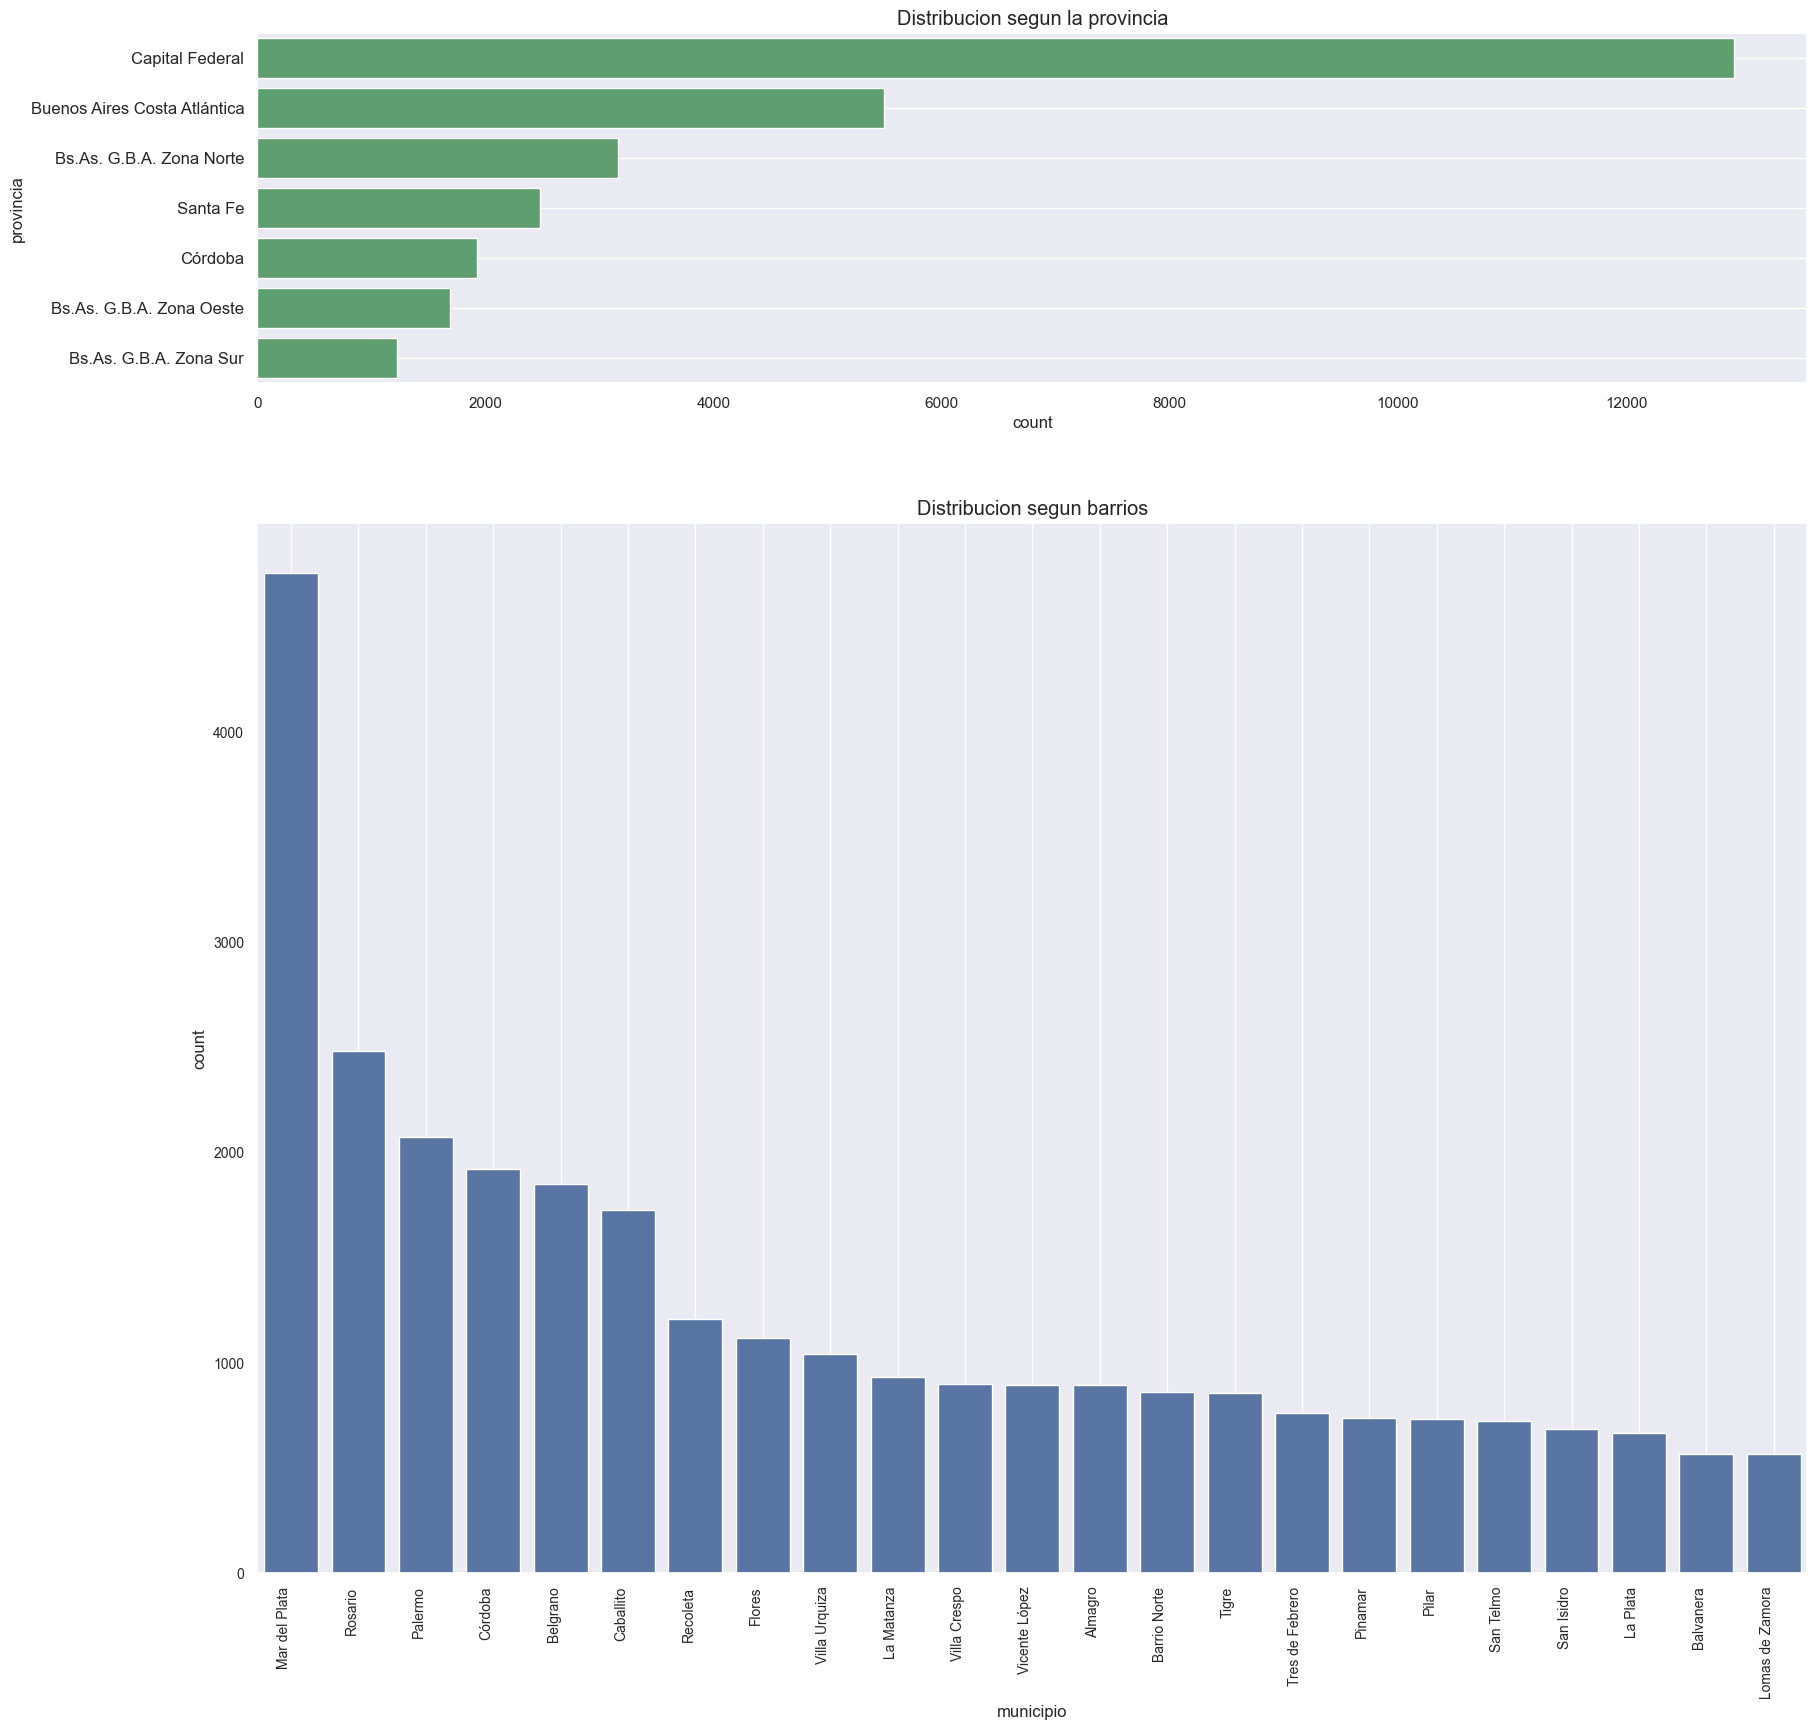

In [106]:
fig= plt.subplots(figsize=(20,20),constrained_layout=True)
grid = gridspec.GridSpec(2, 1, height_ratios=[1, 3])

ax1=plt.subplot(grid[0])
sns.countplot(data=data,y="provincia",order=data["provincia"].value_counts().index ,ax=ax1,color="g")

ax1.set_yticklabels(ax1.get_yticklabels(),fontsize="medium")
ax1.set_title("Distribucion segun la provincia", fontsize= 'large')

ax2=plt.subplot(grid[1])
sns.countplot(data=data,x="municipio",order=data["municipio"].value_counts().index,ax=ax2,color="b")


ax2.set_title("Distribucion segun barrios", fontsize= 'large')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90,ha="right")
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
ax1.grid()
ax2.grid()
plt.show()

In [ ]:
data.describe()

#hay valores de 0 en sup_m2_total y precio_usd_por_m2_cat

In [107]:
data_corr = data.corr()
data_corr

,lat,lon,sup_m2_total,precio_usd,precio_usd_por_m2,tipo_cat_code,municipio_cat_code,provincia_cat_code,ambientes_cat_code,precio_usd_por_m2_cat
lat,1.000000,-0.803067,0.020878,0.128347,0.048817,0.053943,-0.044005,0.495637,-0.036863,0.062437
lon,-0.803067,1.000000,-0.027243,-0.071413,-0.032937,-0.106569,0.117327,-0.557141,0.039807,0.195964
sup_m2_total,0.020878,-0.027243,1.000000,0.381712,-0.028992,0.220498,0.020983,-0.060251,0.229142,-0.147315
precio_usd,0.128347,-0.071413,0.381712,1.000000,0.161335,0.185012,-0.001563,-0.028444,0.312981,0.274139
precio_usd_por_m2,0.048817,-0.032937,-0.028992,0.161335,1.000000,0.015655,0.005609,0.009359,-0.058630,0.166749
tipo_cat_code,0.053943,-0.106569,0.220498,0.185012,0.015655,1.000000,0.068054,-0.057377,0.117702,-0.236421
municipio_cat_code,-0.044005,0.117327,0.020983,-0.001563,0.005609,0.068054,1.000000,0.039399,-0.001005,-0.048666
provincia_cat_code,0.495637,-0.557141,-0.060251,-0.028444,0.009359,-0.057377,0.039399,1.000000,-0.157329,-0.084425
ambientes_cat_code,-0.036863,0.039807,0.229142,0.312981,-0.058630,0.117702,-0.001005,-0.157329,1.000000,-0.173674
precio_usd_por_m2_cat,0.062437,0.195964,-0.147315,0.274139,0.166749,-0.236421,-0.048666,-0.084425,-0.173674,1.000000


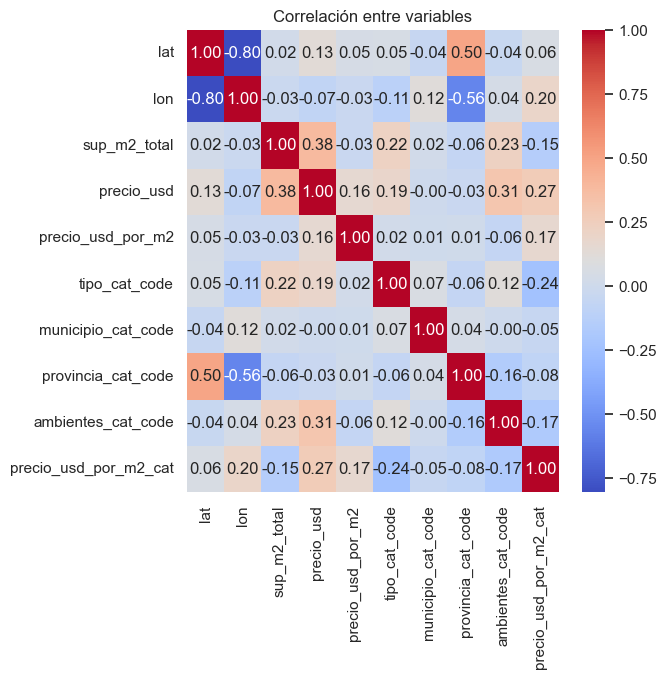

In [108]:
plt.figure(figsize=(6,6))
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()

<Figure size 640x480 with 0 Axes>

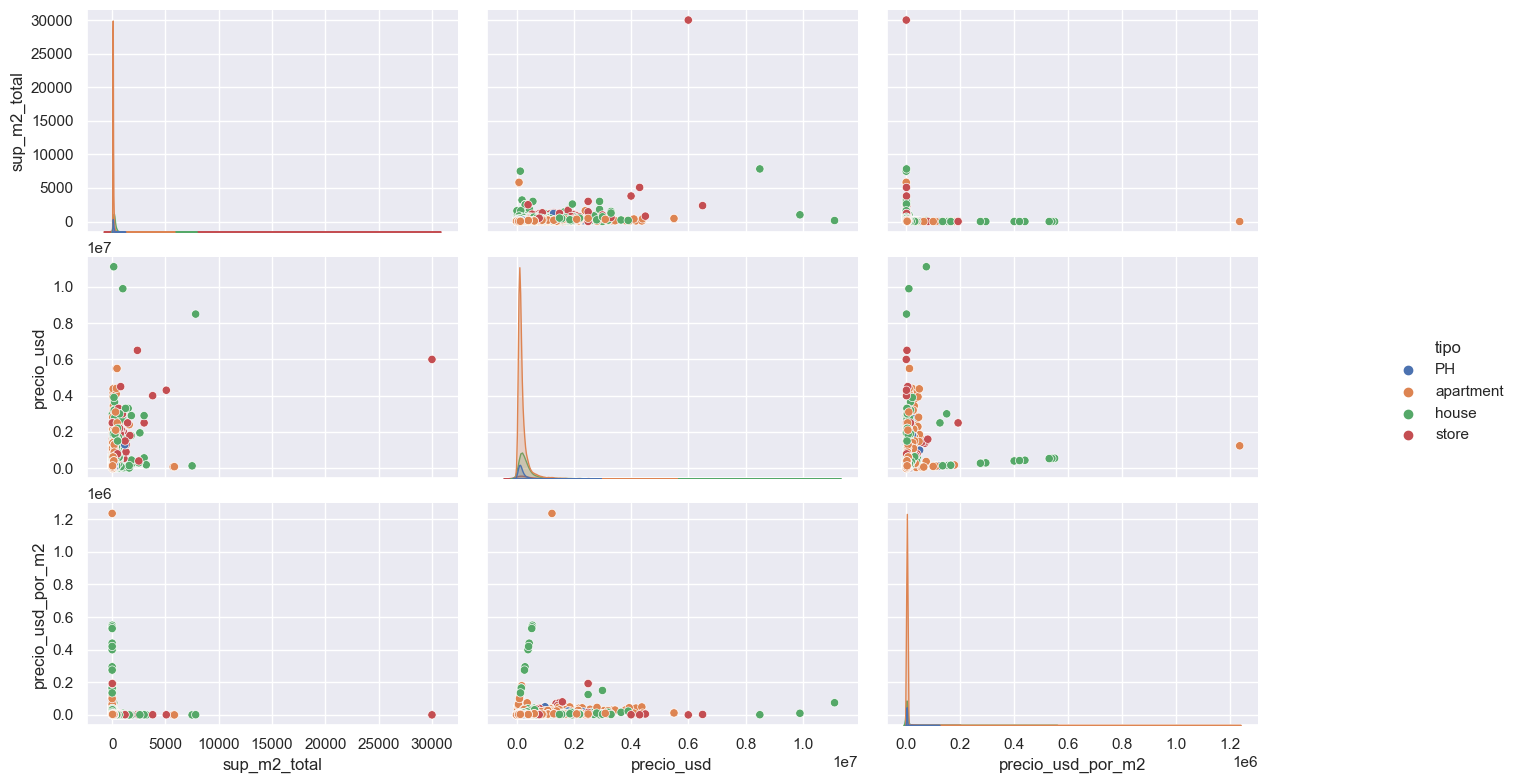

In [109]:
figz= plt.figure()
mask_cols= ["tipo","sup_m2_total","precio_usd","precio_usd_por_m2"]
graph=sns.pairplot(data[mask_cols],hue="tipo")
graph.fig.set_size_inches(16,8)
plt.grid()
plt.show()

In [112]:
data_2 = data[["tipo","sup_m2_total","precio_usd","precio_usd_por_m2", "ambientes_cat", "municipio_cat_code", "ambientes_cat_code"]]

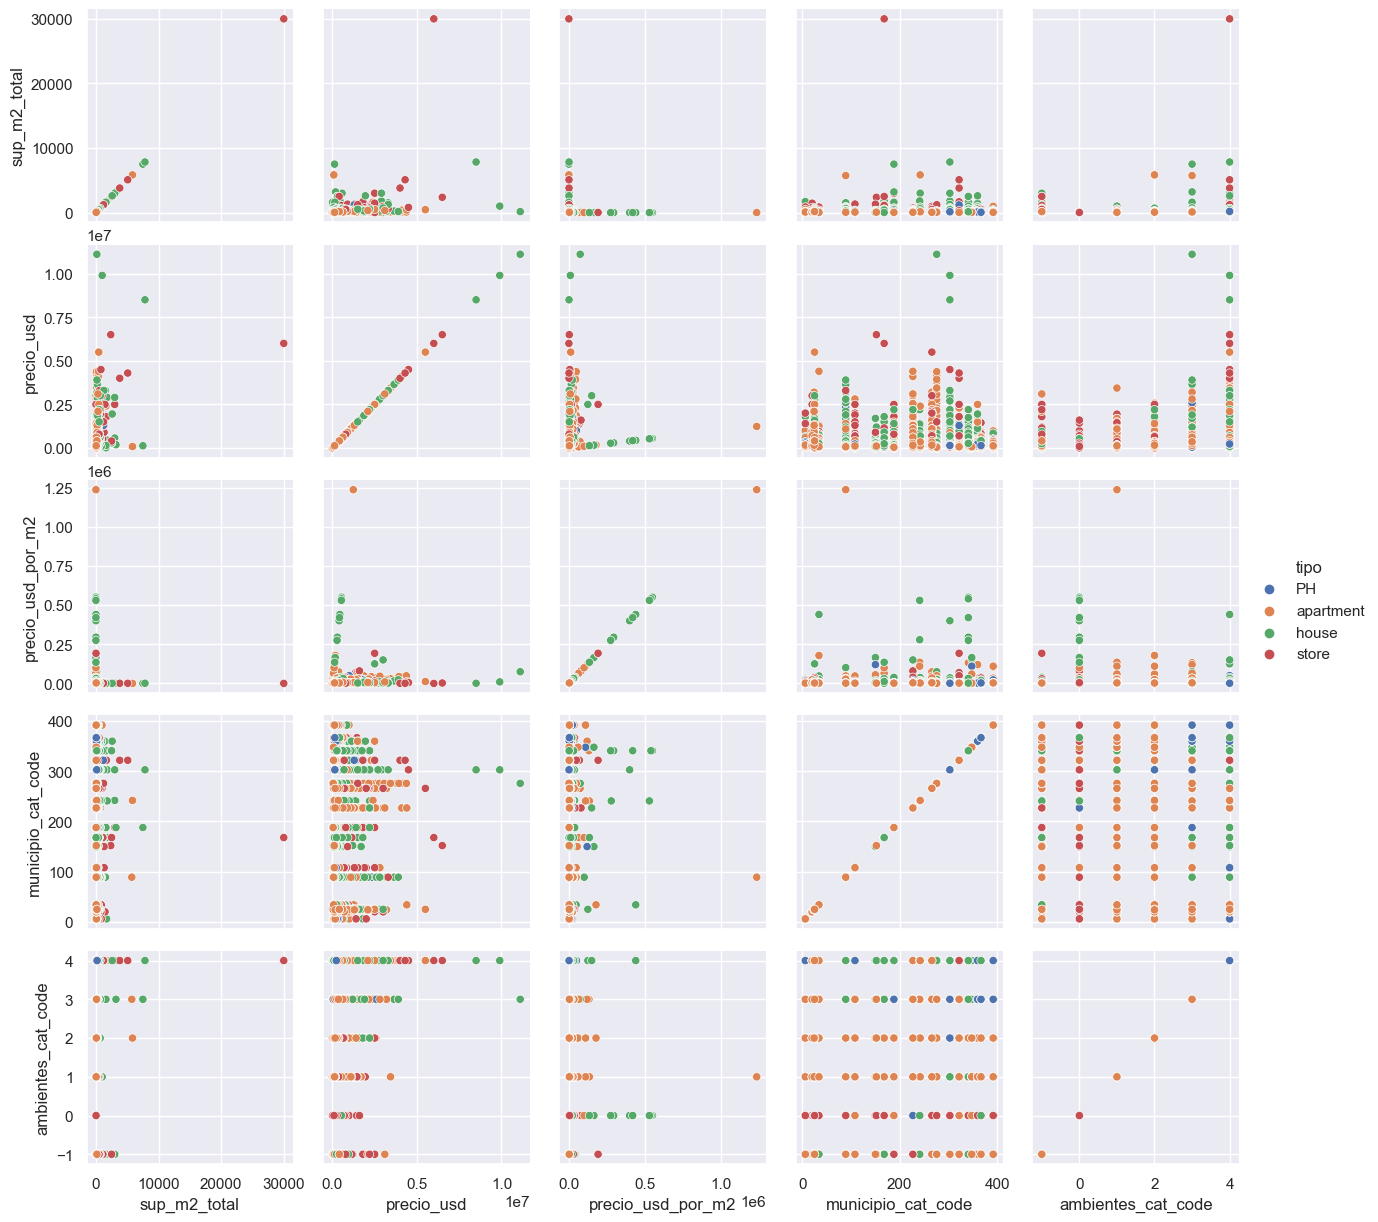

In [111]:
g = sns.PairGrid(data_2, hue="tipo")
g.map(sns.scatterplot)
g.add_legend()

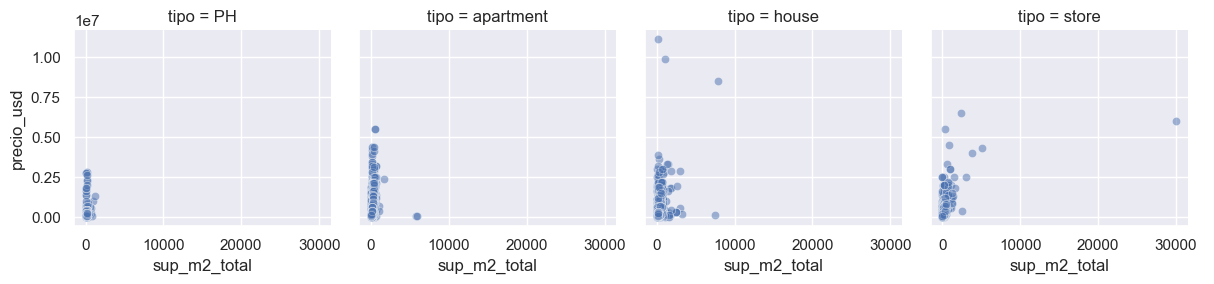

In [113]:
g = sns.FacetGrid(data_2, col="tipo")
g.map(sns.scatterplot, "sup_m2_total", "precio_usd", alpha=.5)
g.add_legend()

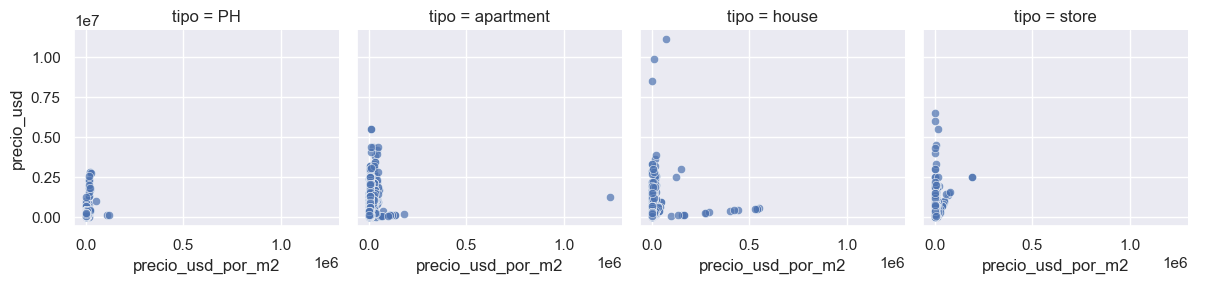

In [114]:
g = sns.FacetGrid(data_2, col="tipo")
g.map(sns.scatterplot, "precio_usd_por_m2", "precio_usd", alpha=.7)
g.add_legend()

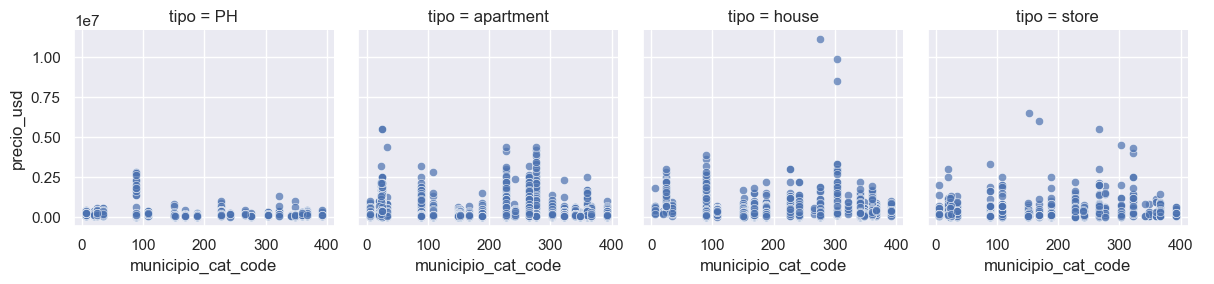

In [115]:
g = sns.FacetGrid(data_2, col="tipo")
g.map(sns.scatterplot, "municipio_cat_code", "precio_usd", alpha=.7)
g.add_legend()

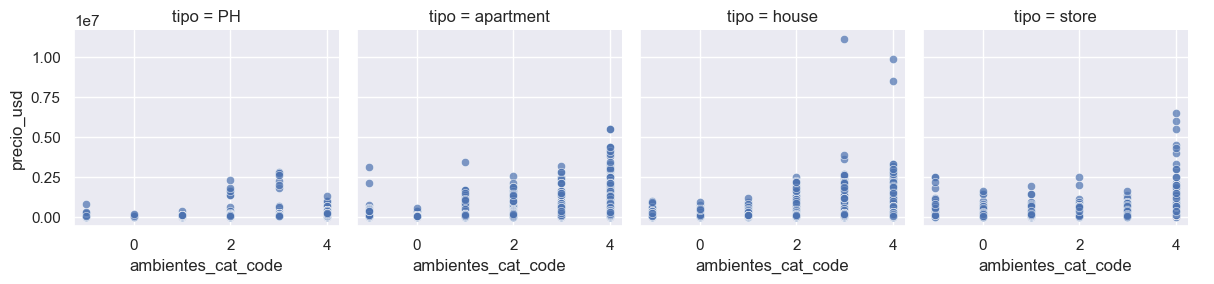

In [116]:
g = sns.FacetGrid(data_2, col="tipo")
g.map(sns.scatterplot, "ambientes_cat_code", "precio_usd", alpha=.7)
g.add_legend()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12848\2233830183.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=masc_dep, x='sup_m2_total', y='precio_usd', palette="deep")


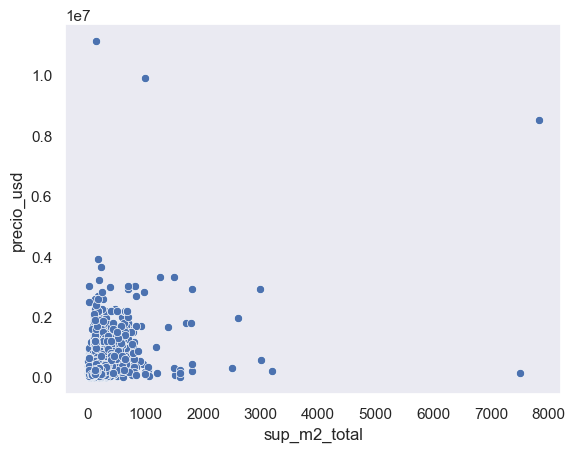

In [117]:
masc_dep = data[data["tipo"]=="house"]
sns.scatterplot(data=masc_dep, x='sup_m2_total', y='precio_usd', palette="deep")
plt.grid()
plt.show()

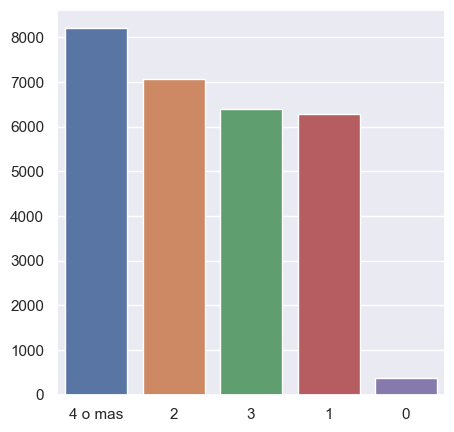

In [118]:
manf_sort = pd.get_dummies(data['ambientes_cat']).sum().sort_values(ascending = False)
plt.figure(figsize=(5,5))
sns.barplot(x = manf_sort.index, y = manf_sort.values)

plt.show()

In [ ]:
#la variable target debe tener una distribucion cercana a la normal

C:\Users\DELL\AppData\Local\Temp\ipykernel_12848\434393269.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=masc_barrio, x='sup_m2_total', y='precio_usd', palette="deep")


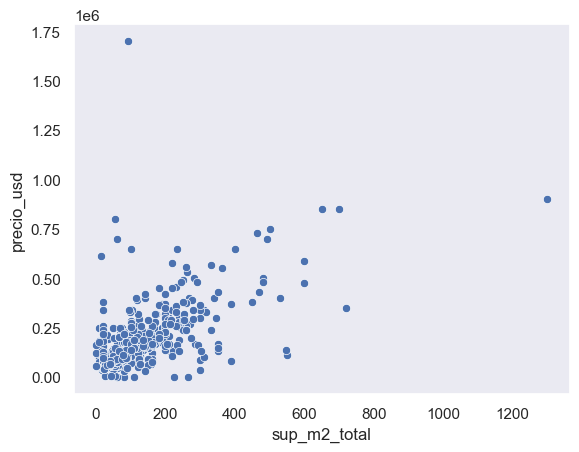

In [124]:
masc_barrio = data[data["municipio"]=="La Matanza"]
sns.scatterplot(data=masc_barrio, x='sup_m2_total', y='precio_usd', palette="deep")
plt.grid()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12848\4246095672.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=masc_barrio, x='sup_m2_total', y='precio_usd', palette="deep")


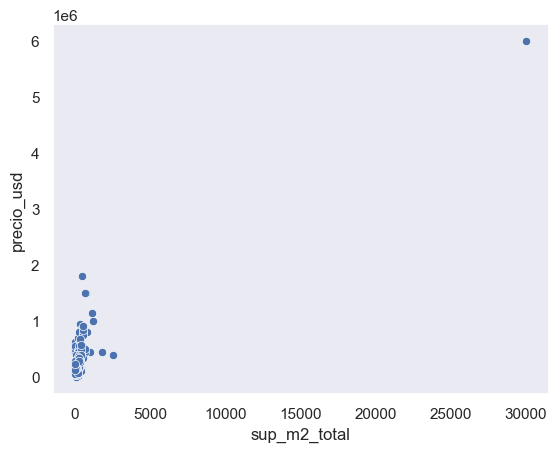

In [126]:
masc_barrio = data[data["municipio"]=="Lomas de Zamora"]
sns.scatterplot(data=masc_barrio, x='sup_m2_total', y='precio_usd', palette="deep")
plt.grid()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12848\36707932.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=masc_barrio, x='sup_m2_total', y='precio_usd', palette="deep")


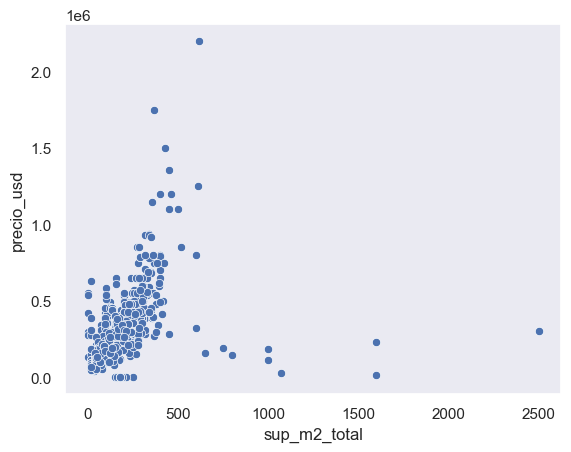

In [127]:
masc_barrio = data[data["municipio"]=="Tigre"]
sns.scatterplot(data=masc_barrio, x='sup_m2_total', y='precio_usd', palette="deep")
plt.grid()
plt.show()